In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [96]:
data = pd.read_csv('/happiness_data (1).csv')
data.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


**[A] Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical**

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


**Dataset Summary:**

- **Dataset Name:** Happiness Dataset
- **Total Features (Columns):** 9
- **Total Instances (Rows):** 1949

**Feature Descriptions:**

1. **Country Name (Categorical):** Identifies the country to which the dataset entry pertains.

2. **GDP per Capita (Continuous):** A numerical value indicating the economic output per person, serving as a gauge for a country's economic prosperity.

3. **Social Support (Continuous):** Numerically quantifies the availability of support from social networks, including family, friends, and community support structures.

4. **Freedom to Make Life Choices (Continuous):** Measures the degree to which individuals feel free to make key decisions in their lives, encompassing choices about work, relationships, and lifestyle.

5. **Generosity (Continuous):** Captures the average level of charitable giving and altruistic behavior within a country's population.

6. **Perceptions of Corruption (Continuous):** Assesses the public's view of the corruption level within the country, reflecting the transparency and integrity of its institutions.

7. **Healthy Life Expectancy at Birth (Continuous):** Indicates the average expected lifespan in good health, offering insight into the population's overall health and longevity.

**[B] Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [98]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [99]:
#Dropping based on the subset of y-columns
data.dropna(subset=['Healthy life expectancy at birth'],inplace=True)

In [100]:
# Get a list of all column names to be used for training
columns_for_training = list(data.columns)

# Exclude specific columns that are not predictors
columns_to_exclude = ['Healthy life expectancy at birth', 'year', 'Life Ladder']
for col in columns_to_exclude:
    columns_for_training.remove(col)

# Display the list of columns that will be used for training the model
print(columns_for_training)


['Country name', 'Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


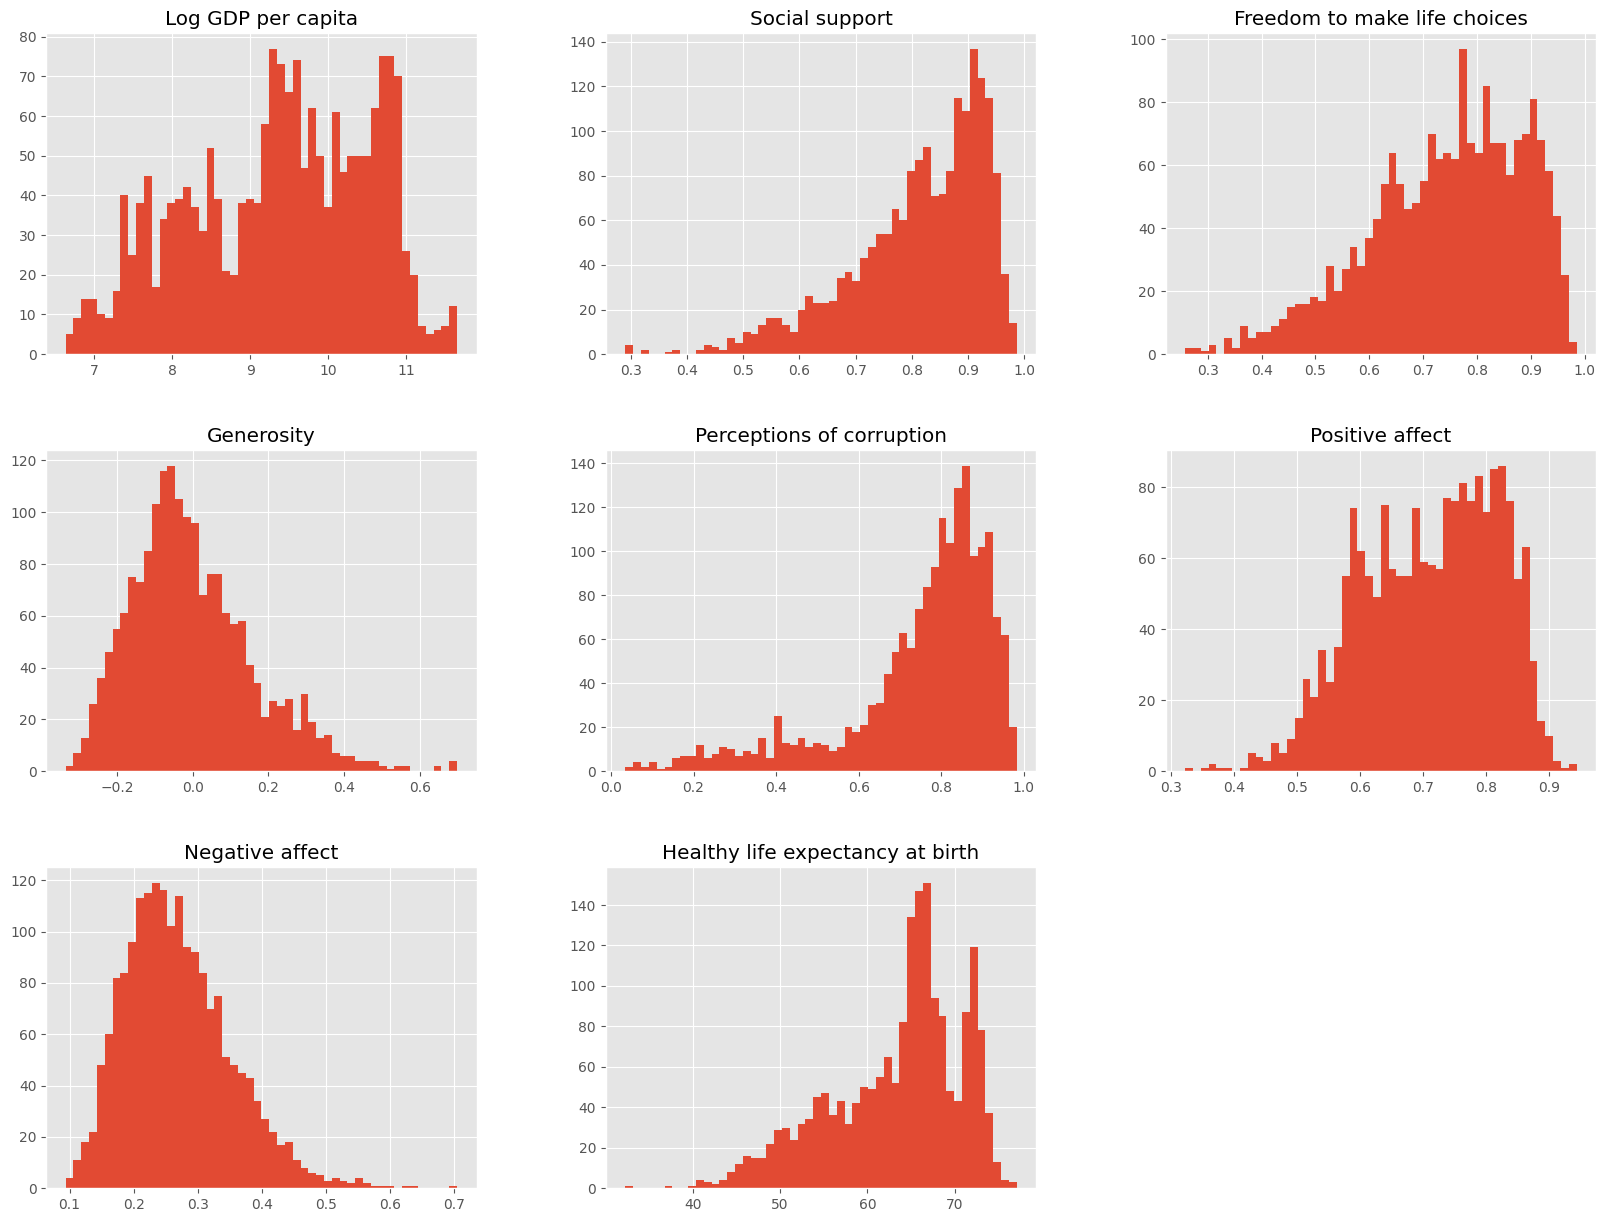

In [102]:
selected_columns = columns_for_training + ['Healthy life expectancy at birth']

# Plot histograms for the selected columns using 50 bins and a figure size of 20x15
data[selected_columns].hist(bins=50, figsize=(20, 15))

# Display the plots
plt.show()

### Histogram Observations:


* Log GDP per capita: Shows a roughly normal distribution, indicating a mix of economically strong and weak countries.
* Social support: Majority of countries have high social support scores.
* Healthy life expectancy at birth: Shows two peaks, suggesting there are two groups of countries based on health expectancy.
* Freedom to make life choices: Majority of countries have scores above 0.6.
* Generosity: Centered around 0, with a few outliers on both sides.
* Perceptions of corruption: Skewed towards higher values, indicating a general high perception of corruption.
* Positive affect: Roughly normally distributed around 0.7.
* Negative affect: Skewed towards lower values, indicating fewer countries with high negative emotions.


**### Special Considerations for Data Preprocessing:**

**Handling Missing Values:**

Every attribute, with the exception of "Country name," has some instances of missing data.

**Normalization of Features:**

To standardize the range across all attributes, feature scaling is imperative. This step is crucial for enhancing the predictive model's accuracy and minimizing skewness.

**Transforming Categorical Variables:**

"Country name" is nominal, hence it necessitates conversion via One-Hot Encoding rather than Label Encoding. This method maintains the non-ordinal nature of the data and prevents the model from assuming a false order between countries.

**[C] Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [5 points]**

In [13]:
# Modify the Log GDP per capita column
from sklearn.base import BaseEstimator, TransformerMixin
from typing import List
class GroupByImputer(BaseEstimator,TransformerMixin):
    def __init__(self,groupby_col:str,continuous_col:List[str]):
        self.groupby_col = groupby_col
        self.continuous_col = continuous_col

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_transformed = X.copy()
        for col in self.continuous_col:
            #Fill the data by the median value
            X_transformed[col] = X_transformed[col].fillna(X_transformed.groupby(self.groupby_col)[col].transform("median"))
        return X_transformed

In [17]:
#Grouping by the country name to fill in the data
imp = GroupByImputer(groupby_col='Country name',continuous_col=train_cols[1:])

imp.fit(data)

transformed_df = imp.transform(data)

In [18]:
transformed_df.isna().sum()


Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   8
Social support                       1
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           8
Perceptions of corruption           28
Positive affect                      2
Negative affect                      1
dtype: int64

In [19]:
#Just dropping the remaining null valued rows
transformed_df.dropna(inplace=True)

In [20]:
transformed_df[train_cols+['Healthy life expectancy at birth']].corr(method="pearson").style.background_gradient(cmap='coolwarm').format(precision=4)


<ipython-input-20-3e9a521e30d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  transformed_df[train_cols+['Healthy life expectancy at birth']].corr(method="pearson").style.background_gradient(cmap='coolwarm').format(precision=4)


,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Healthy life expectancy at birth
Log GDP per capita,1.0000,0.6958,0.3620,-0.0056,-0.3717,0.3029,-0.1986,0.8505
Social support,0.6958,1.0000,0.4178,0.0645,-0.2370,0.4503,-0.4026,0.6171
Freedom to make life choices,0.3620,0.4178,1.0000,0.3355,-0.4945,0.6121,-0.2597,0.3892
Generosity,-0.0056,0.0645,0.3355,1.0000,-0.2892,0.3736,-0.0834,0.0303
Perceptions of corruption,-0.3717,-0.2370,-0.4945,-0.2892,1.0000,-0.3072,0.2548,-0.3367
Positive affect,0.3029,0.4503,0.6121,0.3736,-0.3072,1.0000,-0.3615,0.3181
Negative affect,-0.1986,-0.4026,-0.2597,-0.0834,0.2548,-0.3615,1.0000,-0.1302
Healthy life expectancy at birth,0.8505,0.6171,0.3892,0.0303,-0.3367,0.3181,-0.1302,1.0000


### OBSERVATIONS FROM THE CORRELATION PLOT:

1.   Freedom to make life choices is correlated with postive effect

2.   Log GDP per capita has a stronger relation with social support

3. Log GDP per capita has a stronger relation with Healthy life expectancy at birth. So we will use this to divide our dataset so that the train and test follow similar distribution



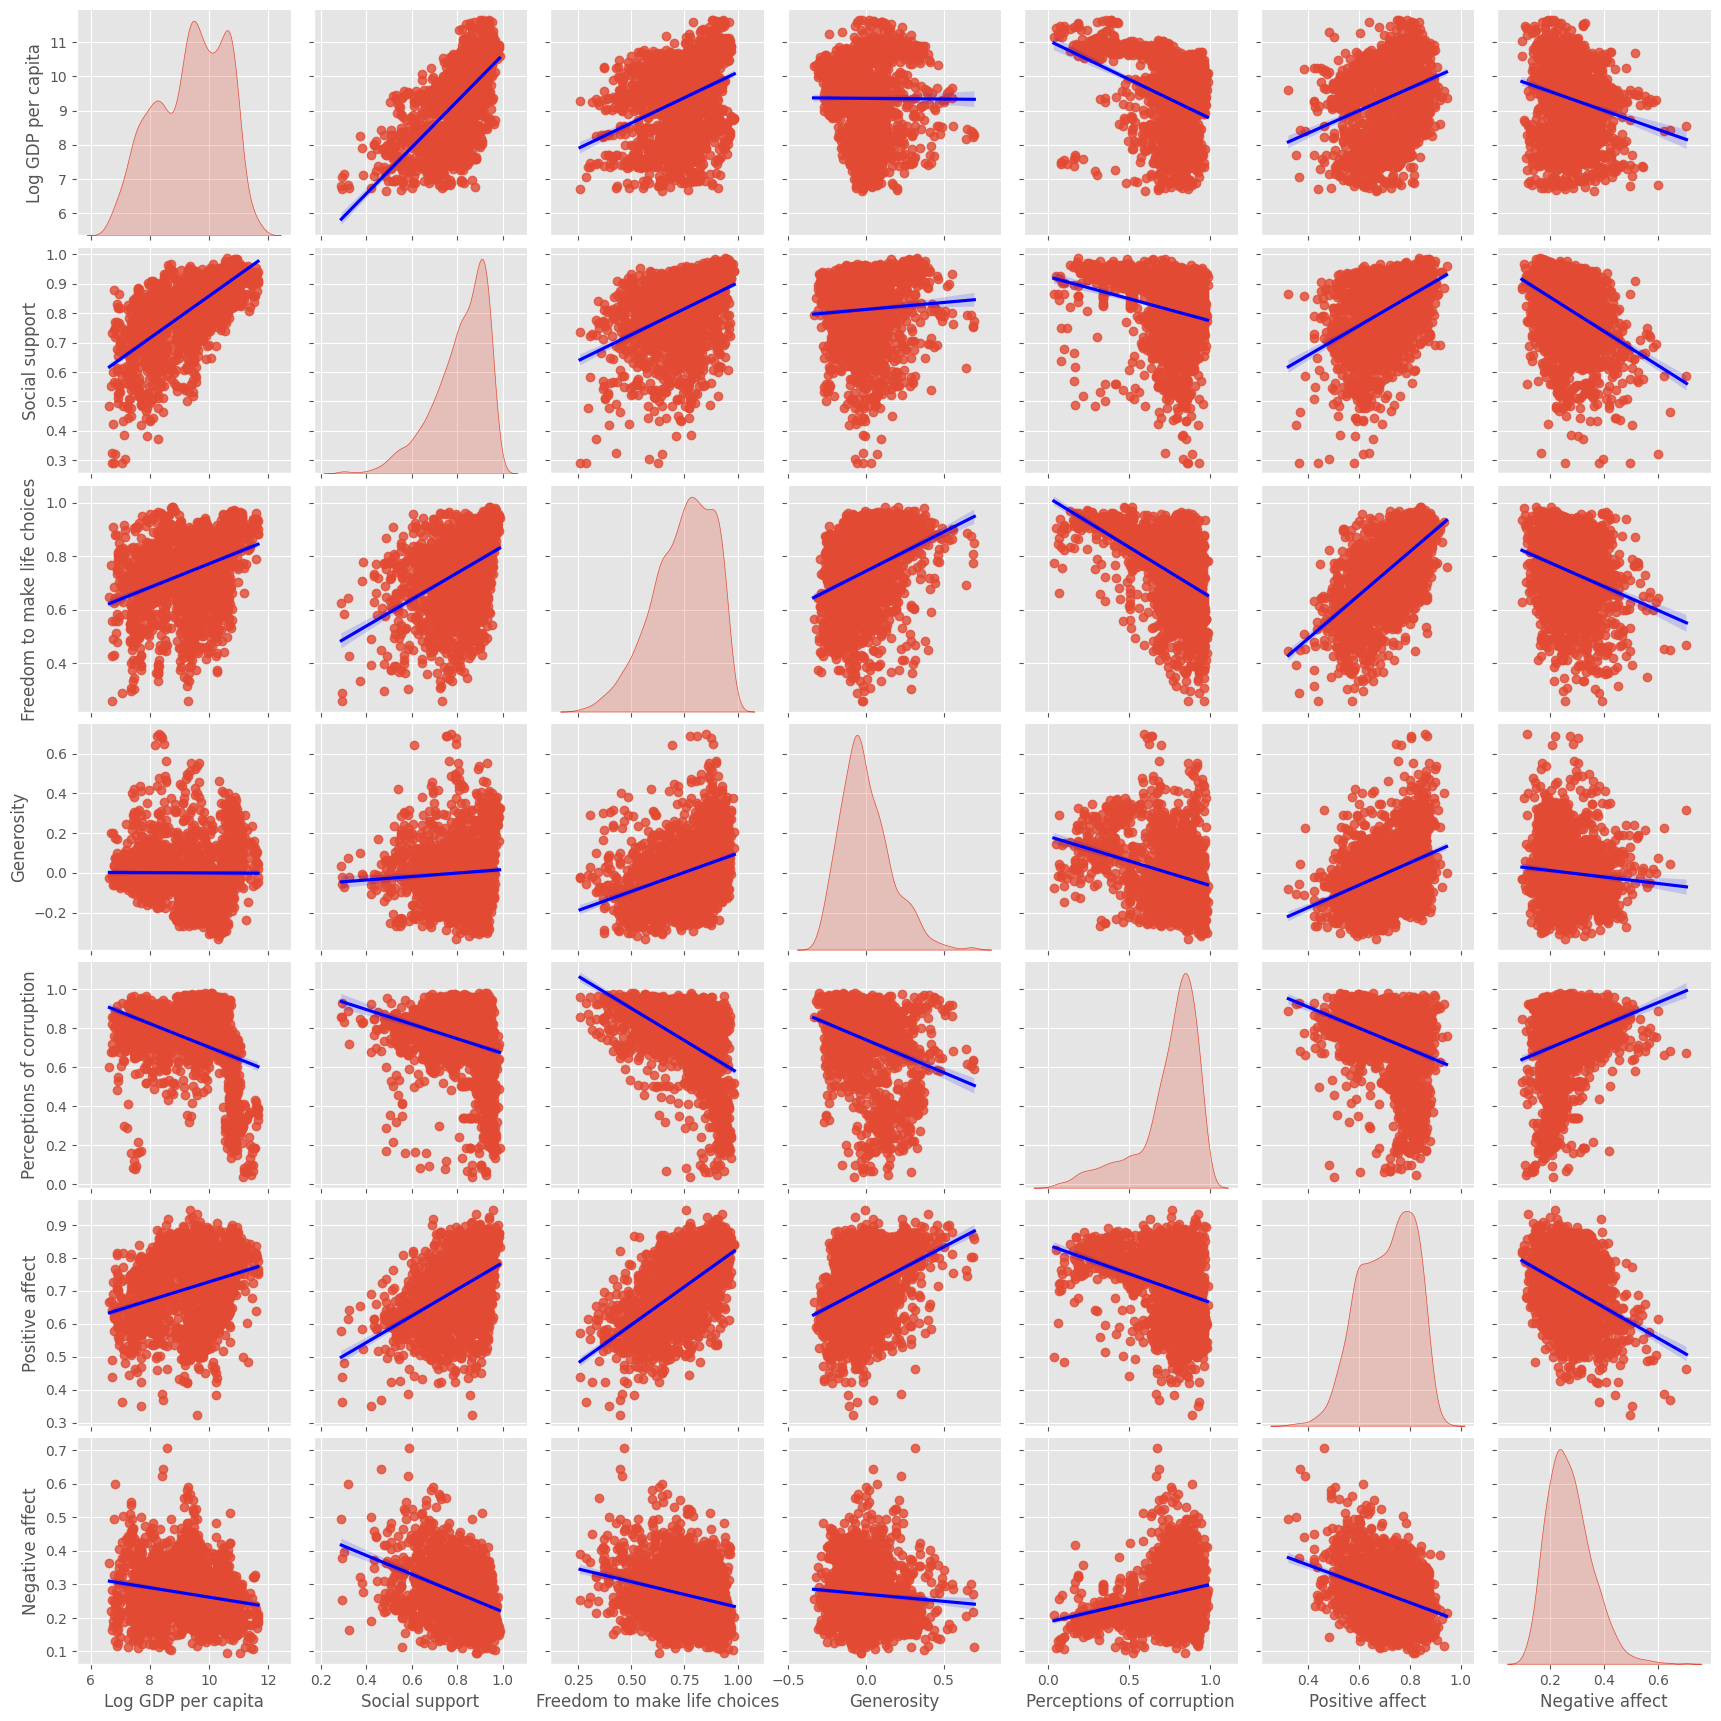

In [21]:
import seaborn as sns

sns.pairplot(transformed_df[train_cols],kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'blue'}})
plt.show()

### STRATIFIED SPLITTING
From the above correlation plots, we

1.   From the above correlation plots, we found that the Log GDP per capita has the highest correlation with the y-column Healthy life expectancy at birth. As the Log GDP is a continuous column, we first cateogrize the column using pd.cut
2.   The we do stratified splitting afterwards


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Categorizing the column Log GDP per capita
transformed_df['log_gdp_cat'] = pd.cut(transformed_df['Log GDP per capita'],
                                        bins=[6,8,10,12],
                                        labels=[0,1,2])

#Min max scaling of the column Log GDP per capita
transformed_df['Log GDP per capita'] = (transformed_df['Log GDP per capita'] -transformed_df['Log GDP per capita'].min())/(transformed_df['Log GDP per capita'].max()-transformed_df['Log GDP per capita'].min())

In [24]:
#Checking if the categorization of the column is uniform and balanced
transformed_df['log_gdp_cat'].value_counts()

1    919
2    639
0    301
Name: log_gdp_cat, dtype: int64

In [25]:
# One-hot encoding for the categorical column Country name
transformed_df = pd.get_dummies(transformed_df, columns = ['Country name'])

In [26]:
#Dropping the columns year and Life Ladder
transformed_df.drop(['year','Life Ladder'],axis=1,inplace=True)

In [27]:
transformed_df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,log_gdp_cat,Country name_Afghanistan,...,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Venezuela,Country name_Vietnam,Country name_Yemen,Country name_Zambia,Country name_Zimbabwe
0,0.146619,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.180531,0.552,51.20,0.679,0.190,0.850,0.584,0.237,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.201875,0.539,51.60,0.600,0.121,0.707,0.618,0.275,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.196489,0.521,51.92,0.496,0.162,0.731,0.611,0.267,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.213445,0.521,52.24,0.531,0.236,0.776,0.710,0.268,0,1,...,0,0,0,0,0,0,0,0,0,0


**[D]Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

In [28]:
from sklearn.model_selection import train_test_split

# X = transformed_df[train_cols+['log_gdp_cat']]
y = transformed_df['Healthy life expectancy at birth']
train_cols = transformed_df.columns.tolist()
train_cols.remove('Healthy life expectancy at birth')
X = transformed_df[train_cols]

# SPLITTING THE DATA BASED ON THE STRATIFIED FOLD SPLIT BASED ON THE LOG GDP PER CAPITA COLUMN
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=X['log_gdp_cat'],random_state=42,shuffle=True)


In [29]:
data = [(X_test['log_gdp_cat'].value_counts()/len(X_test)).values,(X['log_gdp_cat'].value_counts()/len(X)).values]
prop_df = pd.DataFrame(data).T
prop_df.columns = ['Test Set','Data Set']
prop_df

,Test Set,Data Set
0,0.494624,0.494352
1,0.344086,0.343733
2,0.161290,0.161915


* The proportion from the stratified K-fold ensured that our test set is representative of the whole dataset. As we can see that for three types of classes that we have created, the proportions for each of the test data and whole dataset is nearly similar. Hence the test set is representative of the whole dataset

In [30]:
# Dropping the created categorical column
X_train.drop(['log_gdp_cat'],axis=1,inplace=True)
X_test.drop(['log_gdp_cat'],axis=1,inplace=True)

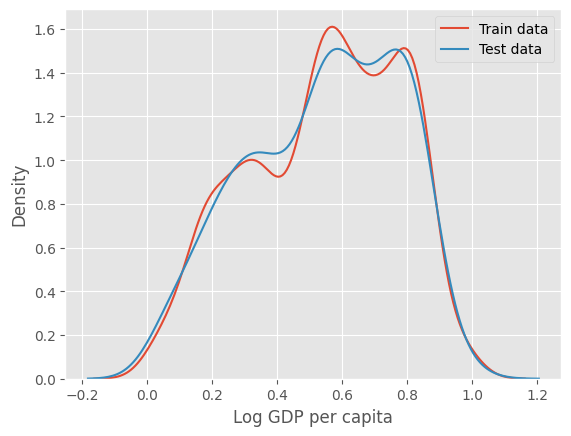

In [31]:
import seaborn as sns
ax = sns.kdeplot(X_train['Log GDP per capita'],label='Train data')
sns.kdeplot(X_test['Log GDP per capita'], ax=ax,label='Test data')
plt.legend()

In [32]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Log GDP per capita,1487.0,0.544239,0.232101,0.000,0.358269,0.56553,0.739278,1.000
Social support,1487.0,0.813005,0.118359,0.291,0.746000,0.83900,0.905000,0.985
Freedom to make life choices,1487.0,0.743802,0.142226,0.258,0.646000,0.76300,0.860000,0.985
Generosity,1487.0,0.000005,0.162625,-0.335,-0.113000,-0.02500,0.091000,0.698
Perceptions of corruption,1487.0,0.742037,0.190810,0.035,0.680500,0.79900,0.875000,0.983
...,...,...,...,...,...,...,...,...
Country name_Venezuela,1487.0,0.008070,0.089500,0.000,0.000000,0.00000,0.000000,1.000
Country name_Vietnam,1487.0,0.007397,0.085719,0.000,0.000000,0.00000,0.000000,1.000
Country name_Yemen,1487.0,0.006052,0.077588,0.000,0.000000,0.00000,0.000000,1.000
Country name_Zambia,1487.0,0.008070,0.089500,0.000,0.000000,0.00000,0.000000,1.000


In [33]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Log GDP per capita,372.0,0.541116,0.229972,0.029922,0.364752,0.562138,0.749052,0.993816
Social support,372.0,0.811142,0.124042,0.290000,0.749750,0.829000,0.911000,0.987000
Freedom to make life choices,372.0,0.742167,0.140278,0.306000,0.647000,0.767500,0.850000,0.971000
Generosity,372.0,-0.000700,0.159468,-0.295000,-0.112000,-0.030000,0.085000,0.650000
Perceptions of corruption,372.0,0.740792,0.180978,0.060000,0.684500,0.794000,0.859250,0.968000
...,...,...,...,...,...,...,...,...
Country name_Venezuela,372.0,0.008065,0.089560,0.000000,0.000000,0.000000,0.000000,1.000000
Country name_Vietnam,372.0,0.008065,0.089560,0.000000,0.000000,0.000000,0.000000,1.000000
Country name_Yemen,372.0,0.008065,0.089560,0.000000,0.000000,0.000000,0.000000,1.000000
Country name_Zambia,372.0,0.005376,0.073225,0.000000,0.000000,0.000000,0.000000,1.000000


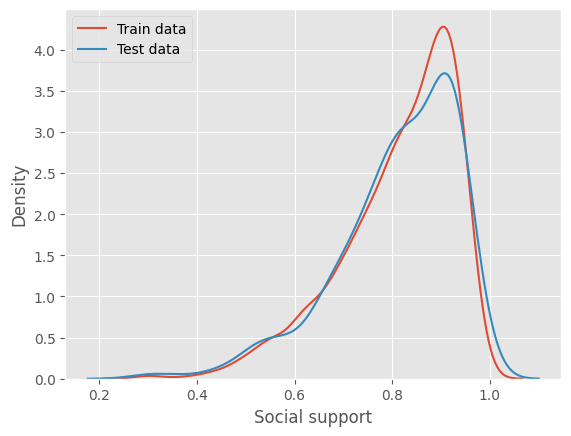

In [34]:
ax = sns.kdeplot(X_train['Social support'],label='Train data')
sns.kdeplot(X_test['Social support'], ax=ax,label='Test data')
plt.legend()

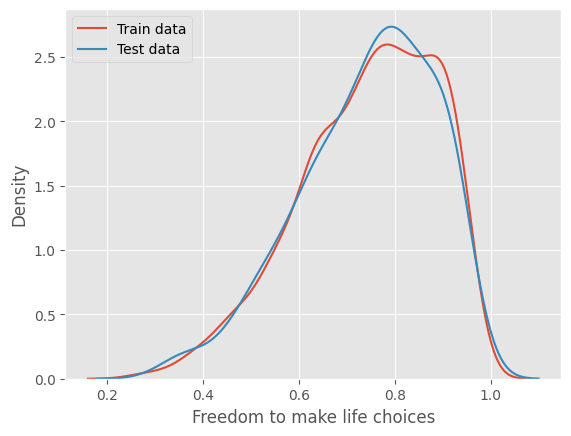

In [35]:
ax = sns.kdeplot(X_train['Freedom to make life choices'],label='Train data')
sns.kdeplot(X_test['Freedom to make life choices'], ax=ax,label='Test data')
plt.legend()

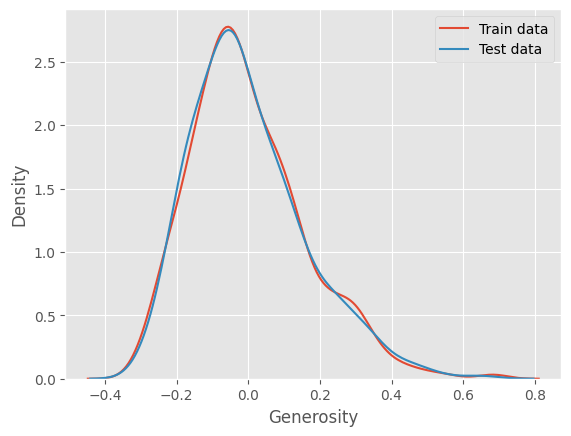

In [36]:
ax = sns.kdeplot(X_train[ 'Generosity'],label='Train data')
sns.kdeplot(X_test[ 'Generosity'], ax=ax,label='Test data')
plt.legend()

* We can see that the train set and the test set have equivalent distribution based on the Log GDP per capita column. It signifies that the test set is representative of our train set, and the split ensures that the model encounters similar distribution of data for both train and test set
* Also, the mean of the columns in both train and test set are nearly similar

* [E]Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration. [10 points]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()

In [40]:
import pprint
cv_lin_reg = cross_validate(lin_reg,X_train,y_train,cv=4,scoring='neg_mean_squared_error',return_train_score=True)
pprint.pprint(cv_lin_reg)


{'fit_time': array([0.09423494, 0.02964139, 0.03004146, 0.02964163]),
 'score_time': array([0.00659108, 0.00558734, 0.00586843, 0.00858498]),
 'test_score': array([-1.87984867e+00, -2.13612848e+23, -7.26803330e+25, -2.33923694e+23]),
 'train_score': array([-1.4378649 , -1.28920673, -1.46254389, -1.45349541])}


In [41]:
lin_reg = [-np.median(cv_lin_reg['train_score']),-np.median(cv_lin_reg['test_score'])]

print(f"The train loss {lin_reg[0]}")
print(f"The validation loss {lin_reg[1]}")

The train loss 1.4456801541331885
The validation loss 2.2376827099376375e+23


In [42]:
test_pred = LinearRegression().fit(X_train,y_train).predict(X_test)

print("The test set error is ", mean_squared_error(y_test,test_pred))

The test set error is  4.657245341672221e+22


#### THE ERROR IN LINEAR REGRESSION IS HIGH BECAUSE OF THE SHEAR NUMBER OF FEATURES IN THE TRAIN SET. BUT LATER WE WILL SEE THAT LASSO REGRESSION AND RIDGE ARE ABLE TO ALLEVIATE THIS ISSUE

## REGULARIZATION LINEAR REGRESSION

In [88]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.model_selection import cross_validate
#List of alpha values that we will cross validate
alpha_list = [0.001,0.01,0.1,1,10]

def regularization_run(X,y,alpha_list:list,scoring=['neg_mean_squared_error']):
    lasso_alpha_dict = {}
    ridge_alpha_dict = {}
    # elastic_alpha_dict = {}

    lasso_model,ridge_model,elastic_model = {},{},{}
    for alpha in alpha_list:
        lasso_reg = Lasso(alpha=alpha,random_state=42)

        ridge_reg = Ridge(alpha=alpha,random_state=42,solver='svd')

        elastic_reg = ElasticNet(alpha=alpha,random_state=42)

        lasso_res = cross_validate(lasso_reg,X,y,cv=4,scoring=scoring,return_train_score=True)
        ridge_res = cross_validate(ridge_reg,X,y,cv=4,scoring=scoring,return_train_score=True)
        elastic_res = cross_validate(elastic_reg,X,y,cv=4,scoring=scoring,return_train_score=True)

        lasso_alpha_dict.update({str(alpha):[-lasso_res['train_neg_mean_squared_error'].mean(),-lasso_res['test_neg_mean_squared_error'].mean()]})
        ridge_alpha_dict.update({str(alpha):[-ridge_res['train_neg_mean_squared_error'].mean(),-ridge_res['test_neg_mean_squared_error'].mean()]})
        elastic_alpha_dict.update({str(alpha):[-elastic_res['train_neg_mean_squared_error'].mean(),-elastic_res['test_neg_mean_squared_error'].mean()]})

        lasso_model.update({str(alpha):lasso_reg.fit(X,y)})
        ridge_model.update({str(alpha):ridge_reg.fit(X,y)})
        elastic_model.update({str(alpha):elastic_reg.fit(X,y)})

    return lasso_alpha_dict,ridge_alpha_dict,lasso_model,ridge_model

lasso_alpha_dict,ridge_alpha_dict,lasso_model,ridge_model = regularization_run(X_train,y_train,alpha_list)

## LASSO REGRESSION

<Axes: title={'center': 'Lasso Regression'}, xlabel='Alpha', ylabel='MSE'>

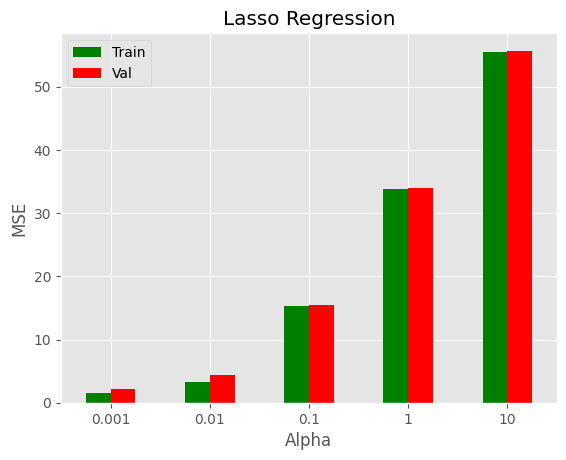

In [45]:
train_color,val_color = 'green','red'
lasso_df = pd.DataFrame(lasso_alpha_dict).T
lasso_df.columns = ['Train','Val']
lasso_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Lasso Regression',xlabel='Alpha',ylabel='MSE')

In [46]:
#Coefficients

val_list = [[key]+lasso_model[key].coef_.tolist() for key in lasso_alpha_dict.keys()]
lasso_coeff_df = pd.DataFrame(val_list,columns=['Alpha Value']+X_train.columns.tolist())
lasso_coeff_df

,Alpha Value,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country name_Afghanistan,Country name_Albania,...,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Venezuela,Country name_Vietnam,Country name_Yemen,Country name_Zambia,Country name_Zimbabwe
0,0.001,28.376440,-0.658686,3.047384,0.212855,-1.45742,0.00000,9.535044,-1.472913,3.760387,...,-7.508198,0.199628,-4.380141,1.538256,4.591823,1.798611,7.484272,-1.117574,-4.660662,-3.889230
1,0.01,27.119778,0.000000,3.087188,0.000000,-0.00000,0.72696,4.987649,-0.123921,2.625196,...,-5.461933,0.000000,-3.108874,0.491214,2.991833,0.418996,5.703376,-0.000000,-3.914023,-3.571188
2,0.1,25.447390,0.000000,0.269343,0.000000,-0.00000,0.00000,0.000000,-0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
3,1,8.788682,0.000000,0.000000,0.000000,-0.00000,0.00000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
4,10,0.000000,0.000000,0.000000,0.000000,-0.00000,0.00000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000


* If we check the coefficients of the Lasso regression, then as the alpha value increases, the weight for some of the features goes to zero. It aligns with Lasso regression sparse representation, as the weights are going to zero as we penalize the weights more and more.
* Below we can see that the number of weights in the feature set that go to zero increases as the alpha value increases.

In [47]:
#Number of zero coeffcients for eahc alpha value
(lasso_coeff_df== 0).astype(int).sum(axis=1)

0     15
1     68
2    160
3    161
4    162
dtype: int64

#### DOING THE PREDICTION WITH THE BEST HYPERPARAMETER FOR ALPHA FOR THE VALIDATION SET

In [48]:
test_pred = Lasso(alpha=0.001).fit(X_train,y_train).predict(X_test)

print("The test set error is ", mean_squared_error(y_test,test_pred))

The test set error is  2.548974029393738


## RIDGE REGRESSION

In [50]:
pprint.pprint(ridge_alpha_dict)

{'0.001': [1.4107765846476075, 2.111049922067477],
 '0.01': [1.4119680936410344, 2.1088752294711215],
 '0.1': [1.4341030731275646, 2.124167752952422],
 '1': [1.7850104754346838, 2.443832711959416],
 '10': [6.811995742353624, 7.628486512350321]}


<Axes: title={'center': 'Ridge Regression'}, xlabel='Alpha', ylabel='MSE'>

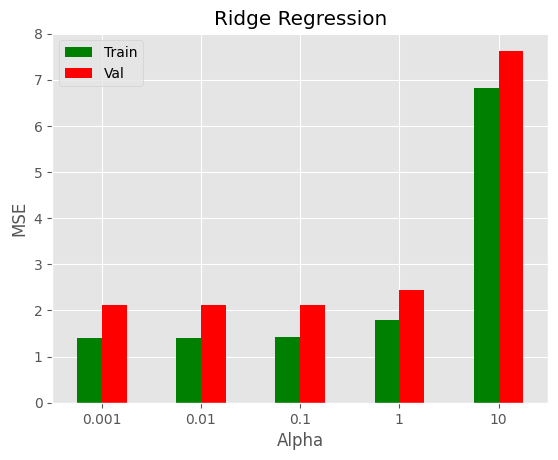

In [51]:
train_color,val_color = 'green','red'
ridge_df = pd.DataFrame(ridge_alpha_dict).T
ridge_df.columns = ['Train','Val']
ridge_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Ridge Regression',xlabel='Alpha',ylabel='MSE')

In [52]:
val_list = [[key]+ridge_model[key].coef_.tolist() for key in ridge_alpha_dict.keys()]
ridge_coeff_df = pd.DataFrame(val_list,columns=['Alpha Value']+X_train.columns.tolist())
ridge_coeff_df

,Alpha Value,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country name_Afghanistan,Country name_Albania,...,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Venezuela,Country name_Vietnam,Country name_Yemen,Country name_Zambia,Country name_Zimbabwe
0,0.001,33.795526,-1.562507,2.607382,0.752263,-2.316189,-0.305665,9.392078,0.341643,4.357515,...,-9.242757,-0.839941,-5.696400,1.735535,5.984639,2.447183,8.985845,0.556930,-2.879214,-1.833337
1,0.01,32.687228,-1.570005,2.724668,0.719647,-2.343050,-0.265054,9.449983,0.015996,4.385620,...,-8.874288,-0.539089,-5.336134,1.826406,5.803787,2.501223,8.824319,0.308041,-3.149128,-2.130469
2,0.1,28.146159,-1.311411,3.209123,0.583118,-2.366892,-0.043264,9.512783,-1.213021,4.497527,...,-7.331863,0.648821,-3.894234,2.158309,4.997001,2.664316,8.098442,-0.680590,-4.222924,-3.354967
3,1,23.734470,1.195860,3.691206,0.388955,-1.823788,0.477944,7.598374,-1.531986,4.448750,...,-5.479234,1.367363,-2.692710,2.087563,3.547677,2.311377,6.654754,-1.352652,-4.840288,-4.462018
4,10,19.684109,4.347605,3.522298,-0.191080,-1.820467,1.191117,2.649098,-0.888089,2.803206,...,-2.603489,1.057331,-1.203464,1.113200,1.211723,1.105760,3.247847,-1.077330,-3.306450,-3.470074


In [53]:
test_pred = Ridge(alpha=0.001).fit(X_train,y_train).predict(X_test)

print("The test set error is ", mean_squared_error(y_test,test_pred))

The test set error is  2.4715075409145872


Elastic Net Regression

In [90]:
results = {}
from sklearn.linear_model import ElasticNet
alphas = [0.0001,0.001,0.1]
for alpha in alphas:
    for l1_ratio in [0.1,0.5,0.9]:
        enr_model = ElasticNet(alpha=alpha,l1_ratio =l1_ratio)
        enr_scores = cross_validate(enr_model, X_train,y_train,cv=4,scoring='neg_mean_squared_error',return_train_score=True)
        results[f'Elastic Net (alpha={alpha}, l1_ratio={l1_ratio})'] = [-enr_scores['train_score'].mean(),-enr_scores['test_score'].mean()]

<Axes: title={'center': 'Elastic Net Regression'}, xlabel='Alpha', ylabel='MSE'>

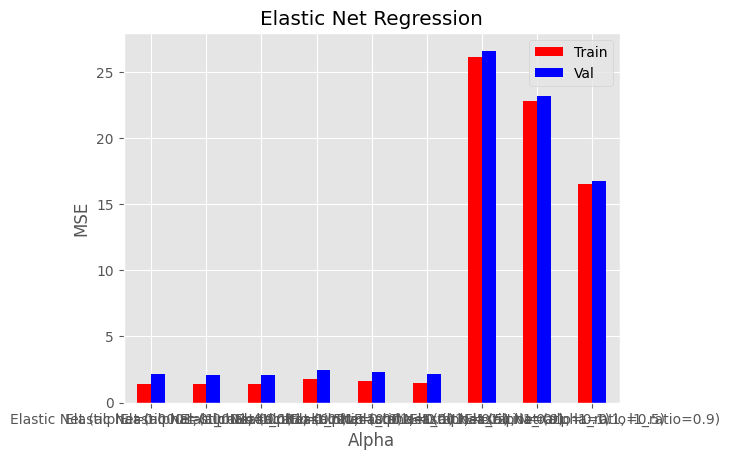

In [92]:
train_color,val_color = 'red','blue'
elastic_data = pd.DataFrame(results).T
elastic_data.columns = ['Train','Val']
elastic_data.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Elastic Net Regression',xlabel='Alpha',ylabel='MSE')

### OBSERVATIONS ABOUT RIDGE, LASSO , ELASTICNET AND LINEAR REGRESSION
* The ridge and lasso , elasticnet regression gave test error very low compared to Linear Regression. This highlights the importance of penalizing the weights for the features. As we have lot of features, linear regression did not penalize the weights corresoponding to lot of features. But Ridge and Lasso regression penalized those features and gave substantially low error.

In [58]:
# Elastic Net Regularization
from sklearn.linear_model import ElasticNet
alphas = [0.001,0.01,0.1]
for alpha in alphas:
    for l1_ratio in [0.1,0.5,0.9]:
        enr_model = ElasticNet(alpha=alpha,l1_ratio =l1_ratio)
        enr_scores = cross_val_score(enr_model, X_train,y_train,cv=4,scoring='neg_mean_squared_error')
        # results[f'Elastic Net (alpha={alpha}, l1_ratio={l1_ratio})'] = -np.mean(enr_scores)

NameError: name 'results' is not defined

## STOCHASTIC GRADIENT DESCENT

In [59]:
import numpy as np
m = len(X_train)
np.random.seed(42)


In [60]:
import math
from tqdm import tqdm

def get_batches(X:pd.DataFrame,y:pd.DataFrame,batch_size:int):
    num_train = X.shape[0]

    indices = np.arange(num_train)
    np.random.shuffle(indices)

    for start_idx in range(0,num_train,batch_size):
        #Ensures that we pick the required number of elements till the last element
        end_idx = min(start_idx+batch_size,num_train)
        batch_idx = indices[start_idx:end_idx]

        yield X.values[batch_idx],y.values[batch_idx]

def get_loss(X,y,weights_list:list):
    losses = []
    val_len = X.shape[0]
    for weight in weights_list:
        curr_weight_loss = 0.0
        for validation_data in zip(X.values,y.values):
            X_curr,y_curr = validation_data
            y_pred = X_curr@weight
            curr_weight_loss+=(y_pred[0]-y_curr)**2
        losses.append(curr_weight_loss/val_len)
    return losses

def learning_rate_scheduler(curr_iter:int,initial_lr:float):
    return initial_lr/math.exp(curr_iter)

def minibatch_sgd(X,y,batch_size:int=32,lr0:float=0.1,num_epochs:int=100):
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X,y,test_size=0.1,random_state=42,shuffle=True)
    weight_path_sgd = []
    weight = np.random.randn(X_train.shape[1],1)
    train_loss = []
    # scale = X_train_.shape[0]//batch_size
    for epoch in tqdm(range(num_epochs)):
        batch_iterator = get_batches(X_train_,y_train_,batch_size)
        curr_train_loss = 0.0
        for idx,batches in enumerate(batch_iterator):
            X_curr,y_curr = batches
            y_curr = np.expand_dims(y_curr,axis=1)
            grads = 2/batch_size * X_curr.T.dot(X_curr.dot(weight) - y_curr)
            # eta = learning_rate_scheduler(idx/scale,lr0)
            weight = weight - lr0*grads
        train_loss.append(get_loss(X_train_,y_train_,[weight])[0])
        weight_path_sgd.append(weight)
    val_loss = get_loss(X_val_,y_val_,weight_path_sgd)

    return weight_path_sgd,train_loss,val_loss


In [61]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.0001,num_epochs=50,batch_size=16)


100%|██████████| 50/50 [00:01<00:00, 28.25it/s]

CPU times: user 1.76 s, sys: 0 ns, total: 1.76 s
Wall time: 1.81 s


In [62]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]


The test loss is: 


77.56396486470156

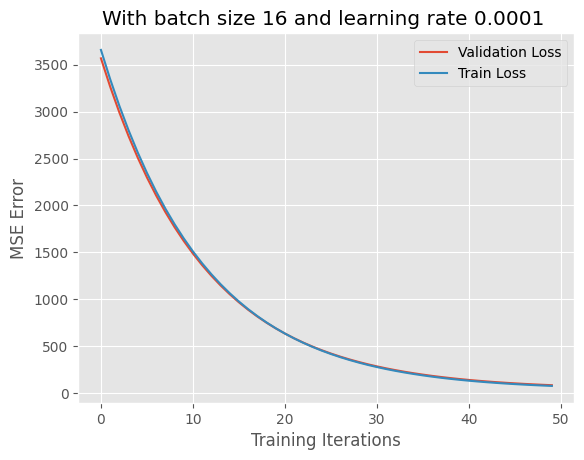

In [63]:
import matplotlib.pyplot as plt
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {16} and learning rate {0.0001} ')
plt.legend()

In [64]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.0001,num_epochs=50,batch_size=1)

100%|██████████| 50/50 [00:25<00:00,  1.96it/s]

CPU times: user 22.8 s, sys: 10.6 ms, total: 22.8 s
Wall time: 25.6 s


In [66]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]

The test loss is: 


26.823603674442175

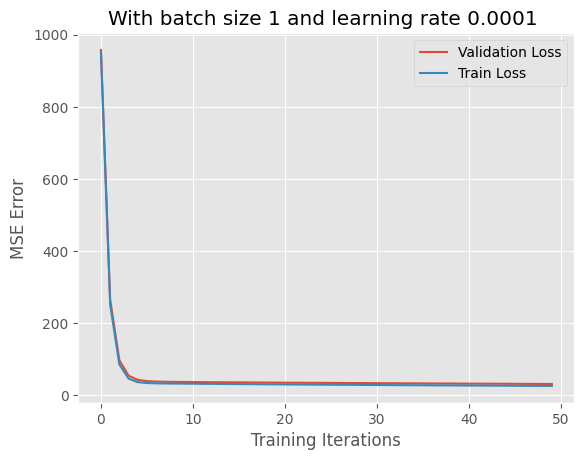

In [67]:
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {1} and learning rate {0.0001} ')
plt.legend()

In [68]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.01,num_epochs=20,batch_size=1)

100%|██████████| 20/20 [00:12<00:00,  1.66it/s]

CPU times: user 9.6 s, sys: 21.3 ms, total: 9.62 s
Wall time: 12.1 s


In [69]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]

The test loss is: 


6.2799636259190725

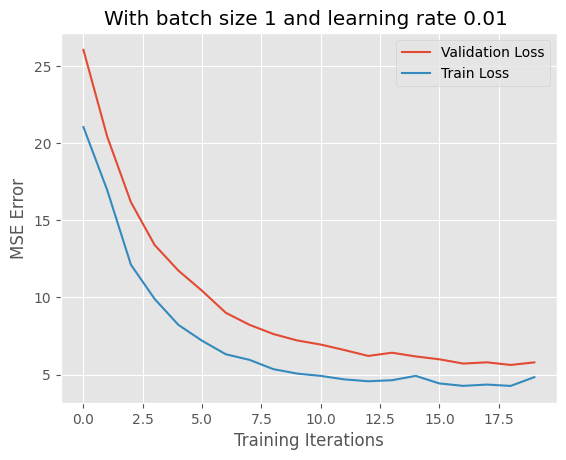

In [70]:
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {1} and learning rate {0.01} ')
plt.legend()


In [71]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.01,num_epochs=50,batch_size=32)

100%|██████████| 50/50 [00:01<00:00, 36.62it/s]


CPU times: user 1.32 s, sys: 3.75 ms, total: 1.33 s
Wall time: 1.44 s


In [72]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]

The test loss is: 


17.565753202844963

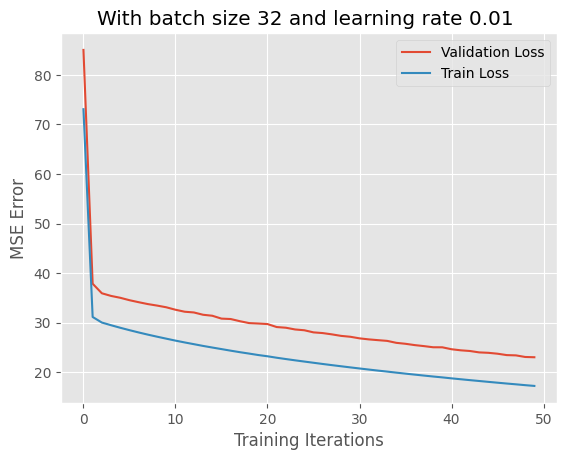

In [73]:
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {32} and learning rate {0.01} ')
plt.legend()

#### OBSERVATIONS
* We can see that if the batch size is lower, then the training time increases. Like for a batch size of 1 (SGD), we got training time of around `12s`, but for larger batch sizes the training is lower
* For lower batch size, the learning curves are not smooth, rather they are also oscillating.
* For lower batch size, the learning curves for train and validation have some disparity, which suggests overfitting, which not substantial for higher batch sizes
* With SGD and smaller learning rate, the learning curve are noisy

In [74]:
## POLYNOMIAL REGRESSION

In [75]:
from sklearn.preprocessing import PolynomialFeatures

degree_list = [2,3,5]


In [76]:
import math
from tqdm import tqdm

def get_batches(X:pd.DataFrame,y:pd.DataFrame,batch_size:int):
    num_train = X.shape[0]

    indices = np.arange(num_train)
    np.random.shuffle(indices)

    for start_idx in range(0,num_train,batch_size):
        #Ensures that we pick the required number of elements till the last element
        end_idx = min(start_idx+batch_size,num_train)
        batch_idx = indices[start_idx:end_idx]

        yield X.values[batch_idx],y.values[batch_idx]

def get_loss(X,y,weights_list:list):
    print(X.shape,y.shape)
    losses = []
    val_len = X.shape[0]
    for weight in weights_list:
        curr_weight_loss = 0.0
        for validation_data in zip(X.values,y.values):
            X_curr,y_curr = validation_data
            # print(X_curr.shape,weight.shape)
            y_pred = (X_curr.T)@weight
            curr_weight_loss+=(y_pred[0]-y_curr)**2
            break
        losses.append(curr_weight_loss/val_len)
    return losses

def learning_rate_scheduler(curr_iter:int,initial_lr:float):
    return initial_lr/math.exp(curr_iter)

def minibatch_sgd(X,y,batch_size:int=32,lr0:float=0.1,num_epochs:int=100):
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X,y,test_size=0.1,random_state=42,shuffle=True)
    weight_path_sgd = []
    weight = np.random.randn(X_train_.shape[1],1)
    # print(weight.shape,X_train_.shape,X_val_.shape)
    train_loss = []
    # scale = X_train_.shape[0]//batch_size
    for epoch in tqdm(range(num_epochs)):
        batch_iterator = get_batches(X_train_,y_train_,batch_size)
        curr_train_loss = 0.0
        for idx,batches in enumerate(batch_iterator):
            X_curr,y_curr = batches
            y_curr = np.expand_dims(y_curr,axis=1)
            grads = 2/batch_size * X_curr.T.dot(X_curr.dot(weight) - y_curr)
            # eta = learning_rate_scheduler(idx/scale,lr0)
            weight = weight - lr0*grads
        train_loss.append(get_loss(X_train_,y_train_,[weight])[0])
        weight_path_sgd.append(weight)
    val_loss = get_loss(X_val_,y_val_,weight_path_sgd)

    return weight_path_sgd,train_loss,val_loss

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge
lin_reg_poly = {}
lin_reg_poly_model = {}
lasso_alpha_dict = {}
ridge_alpha_dict = {}
elastic_alpha_dict = {}
sgd_deg_dict = {}

#Take a subset of train data columns
X_sub_train = X_train[X_train.columns[:7]]
for deg in degree_list:
    poly_transform = PolynomialFeatures(degree=deg,interaction_only=True)
    cv_poly_reg = LinearRegression()
    cv_poly_lasso_reg = Lasso()
    cv_poly_ridge_reg = Ridge()
    cv_elastic_poly_reg =  ElasticNet()

    X_poly = poly_transform.fit_transform(X_sub_train)
    X_poly = pd.DataFrame(X_poly)
    cv_lin_reg_poly = cross_validate(cv_poly_reg,X_poly,y_train,cv=4,scoring='neg_mean_squared_error',return_train_score=True,n_jobs=-1)
    lasso_res = cross_validate(cv_poly_lasso_reg,X,y,cv=4,scoring='neg_mean_squared_error',return_train_score=True)
    ridge_res = cross_validate(cv_poly_ridge_reg,X,y,cv=4,scoring='neg_mean_squared_error',return_train_score=True)
    elastic_res = cross_validate(cv_elastic_poly_reg,X,y,cv=4,scoring='neg_mean_squared_error',return_train_score=True)
    lasso_alpha_dict.update({str(deg):[-lasso_res['train_score'].mean(),-lasso_res['test_score'].mean()]})
    ridge_alpha_dict.update({str(deg):[-ridge_res['train_score'].mean(),-ridge_res['test_score'].mean()]})
    elastic_alpha_dict.update({str(deg):[-elastic_res['train_score'].mean(),-elastic_res['test_score'].mean()]})
    lin_reg_poly.update({f'{deg}':[-cv_lin_reg_poly['train_score'].mean(),-cv_lin_reg_poly['test_score'].mean()]})

    weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_poly,y_train,lr0=0.01,num_epochs=50,batch_size=32)

    sgd_deg_dict.update({str(deg):[train_loss,val_loss]})

 74%|███████▍  | 37/50 [00:00<00:00, 192.13it/s]

(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)


100%|██████████| 50/50 [00:00<00:00, 179.62it/s]


(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(1338, 29) (1338,)
(149, 29) (149,)


 80%|████████  | 40/50 [00:00<00:00, 199.08it/s]

(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)


100%|██████████| 50/50 [00:00<00:00, 198.22it/s]


(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(1338, 64) (1338,)
(149, 64) (149,)


 80%|████████  | 40/50 [00:00<00:00, 210.08it/s]

(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120)

100%|██████████| 50/50 [00:00<00:00, 198.24it/s]

 (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(1338, 120) (1338,)
(149, 120) (149,)


In [78]:
train_color,val_color = 'green','red'
poly_df = pd.DataFrame(lin_reg_poly).T
poly_df.columns = ['Train','Val']
print(poly_df)

       Train        Val
2  12.563923  13.224818
3  11.465560  13.027999
5  10.619219  18.988798


<Axes: title={'center': 'Polynomial Linear Regression'}, xlabel='Degree', ylabel='MSE'>

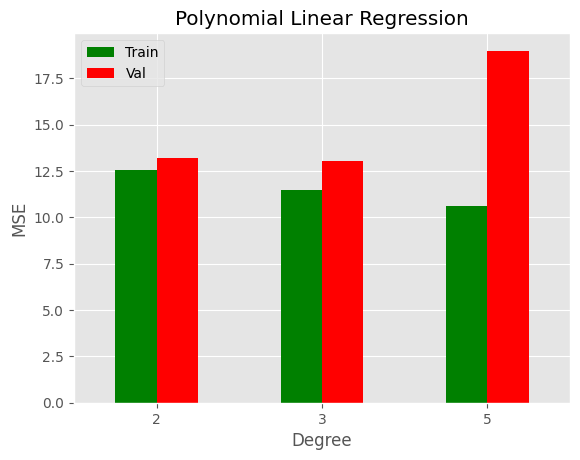

In [79]:
poly_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Polynomial Linear Regression',xlabel='Degree',ylabel='MSE')

In [80]:
train_color,val_color = 'green','red'
poly_df = pd.DataFrame(lasso_alpha_dict).T
poly_df.columns = ['Train','Val']
print(poly_df)

       Train       Val
2  24.073566  24.20113
3  24.073566  24.20113
5  24.073566  24.20113


<Axes: title={'center': 'Polynomial Lasso Regression'}, xlabel='Degree', ylabel='MSE'>

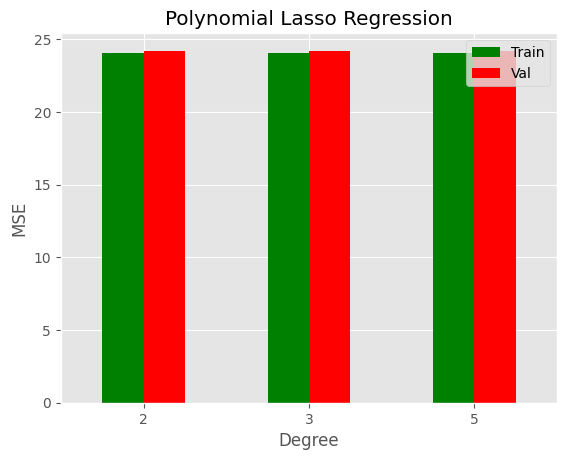

In [81]:
poly_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Polynomial Lasso Regression',xlabel='Degree',ylabel='MSE')

     Train        Val
2  1.84786  15.845614
3  1.84786  15.845614
5  1.84786  15.845614


<Axes: title={'center': 'Polynomial Ridge Regression'}, xlabel='Degree', ylabel='MSE'>

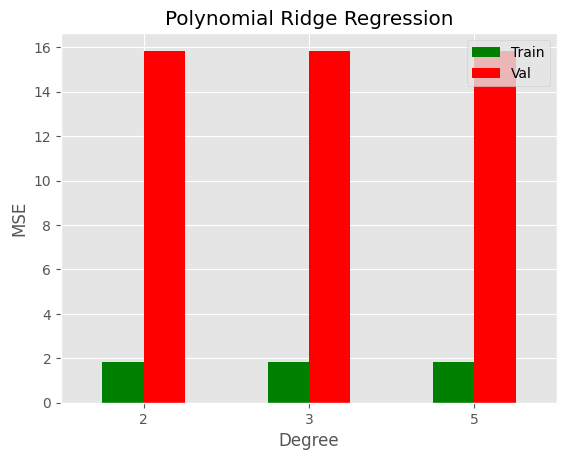

In [82]:
train_color,val_color = 'green','red'
poly_df = pd.DataFrame(ridge_alpha_dict).T
poly_df.columns = ['Train','Val']
print(poly_df)

poly_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Polynomial Ridge Regression',xlabel='Degree',ylabel='MSE')

       Train        Val
2  32.340062  32.499088
3  32.340062  32.499088
5  32.340062  32.499088


<Axes: title={'center': 'Polynomial Elastic Regression'}, xlabel='Degree', ylabel='MSE'>

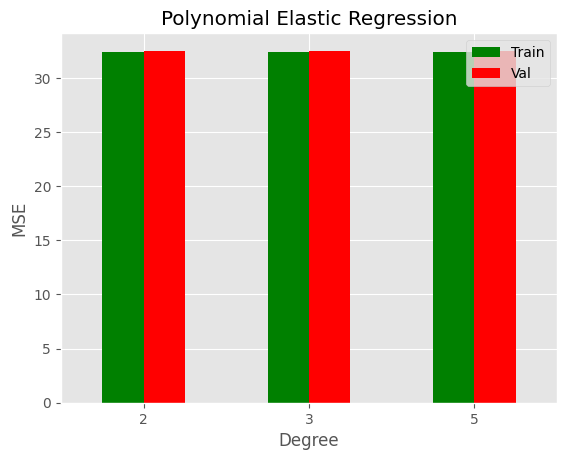

In [83]:
train_color,val_color = 'green','red'
poly_df = pd.DataFrame(elastic_alpha_dict).T
poly_df.columns = ['Train','Val']
print(poly_df)

poly_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Polynomial Elastic Regression',xlabel='Degree',ylabel='MSE')

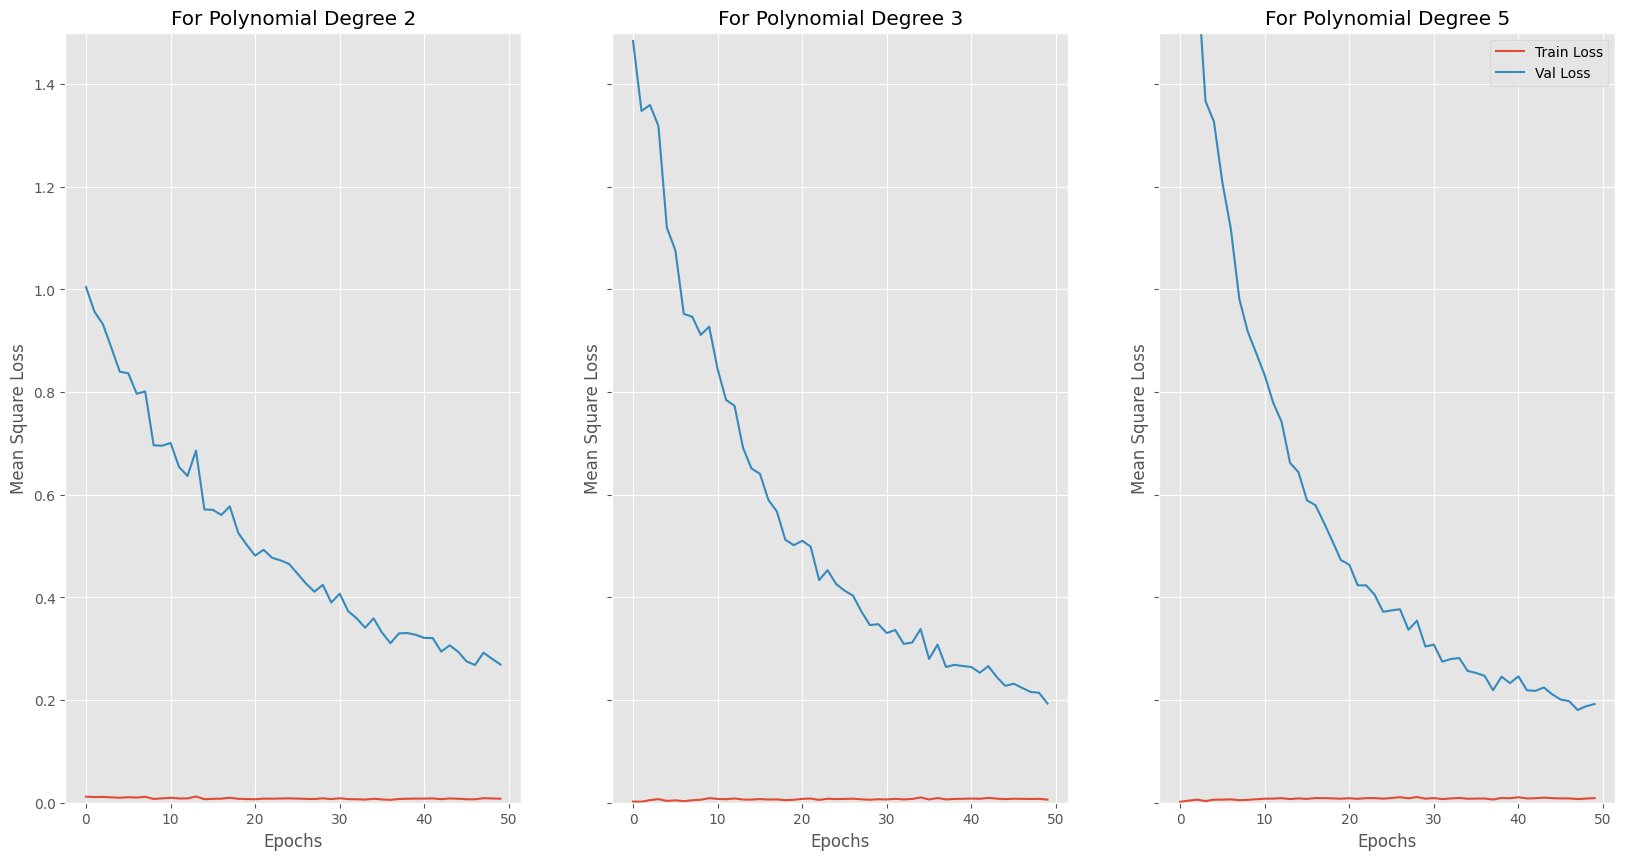

In [84]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharex=True,sharey=True)
#plt.figure(figsize=(30,15))

keys = list(sgd_deg_dict.keys())
ax[0].plot(sgd_deg_dict[keys[0]][0],label='Train Loss')
ax[0].plot(sgd_deg_dict[keys[0]][1],label='Val Loss')
ax[0].set_title(f"For Polynomial Degree {keys[0]}")
ax[0].set_ylabel("Mean Square Loss")
ax[0].set_xlabel("Epochs")
ax[1].plot(sgd_deg_dict[keys[1]][0],label='Train Loss')
ax[1].plot(sgd_deg_dict[keys[1]][1],label='Val Loss')
ax[1].set_title(f"For Polynomial Degree {keys[1]}")
ax[1].set_ylabel("Mean Square Loss")
ax[1].set_xlabel("Epochs")
ax[2].plot(sgd_deg_dict[keys[2]][0],label='Train Loss')
ax[2].plot(sgd_deg_dict[keys[2]][1],label='Val Loss')
ax[2].set_title(f"For Polynomial Degree {keys[2]}")
ax[2].set_ylabel("Mean Square Loss")
ax[2].set_xlabel("Epochs")
plt.ylim(0,1.5)
plt.legend()
plt.show()

# <span style="color:red">QUESTION F</span>

* We can see that the disparity between the train and validation set increases with the degree of the polynomial. This signals overfitting, as we increase the number of features, the validation and train set error starts to diverge, and also the training time increases.
* So a polynomial regression with degree 2 is the feasible feature expansion procedure
* Also, with Polynomial regression for Lasso, Ridge and Elastic Net with default parameters, we find that the models are ignoring the higher order terms as they are not providing any extra information to help the model. Also, for Lasso, we can see that the error is same for all degrees as Lasso is sparse model, hence it just equates all the extra features to zero. BUT Ridge tends to overfit as it is not driving some coefficients of the features to 0, so lasso is preventing overfitting here.
* Now, for SGD, we can see that the model has **overfitted** the training data and there is a large discrepancy in the training and validation error. This shows that feature set expansion by polynomial features for SGD is an ineffective way and it leads to severe overfitting. Hence we will discard this for further analysis

Summarizing the test set results

1. Linear Regression: 3.9e+22
2. Linear Regression with Polynomial Degree: 13.04
3. Lasso: 2.54
4. Lasso with Polynomial degree: 24.2013
5. Ridge : 2.47
6. Ridge with Polynomial degree: 15.845
7. Elastic: 5.73
8. Elastic with Polynomial degree: 32.499
9. Minibatch SGD: 17.86
10. Minibatch with Polynomial regression: 0.23

So from our 10 models, we will choose the Minibatch SGD with Polynomial regression of degree 2 with testing error of 0.23. SGD performs well for the data because it is able to exploit the increase in the dimensionality of the data. But its performance starts to deteoriate with increase in polynomial degree, so a sweet spot would be degree 2

G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]

# <span style="color:red">FURTHER IMPROVEMENTS</span>
* We can do a hyperparameter sweep for more variables with grid search technique to find the right set of hyperparameters
* A better encoding of the country names instead of one-hot encoding as it increases the feature space substantially. So a heuristic-based encoding of country names can improve the performance
* We can go for Deep Neural Networks as they can improve with the dimensionality of the data for the regression task